In [1]:
import pandas as pd
from collections import Counter


In [2]:
transaction_data=pd.read_excel(r"C:\Users\India\Downloads\QVI_transaction_data.xlsx")
print(transaction_data.head(5))

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [3]:
customer_data=pd.read_csv(r"C:\Users\India\Downloads\QVI_purchase_behaviour.csv")
print(customer_data.head(5))

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [4]:
print(customer_data.dtypes)

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [5]:
print(transaction_data.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [6]:

print(transaction_data.dtypes)



DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [7]:
print(transaction_data['DATE'].head())
print(transaction_data['DATE'].dtype)


0    43390
1    43599
2    43605
3    43329
4    43330
Name: DATE, dtype: int64
int64


In [8]:
from datetime import timedelta, datetime
excel_origin = datetime(1899, 12, 30)

# Convert Excel serial numbers manually
transaction_data['DATE'] = transaction_data['DATE'].apply(lambda x: excel_origin + timedelta(days=int(x)))

# Optional: remove time (keep only date)
transaction_data['DATE'] = transaction_data['DATE'].dt.date

# Verify
print(transaction_data['DATE'].head())
print(transaction_data['DATE'].dtype)

0    2018-10-17
1    2019-05-14
2    2019-05-20
3    2018-08-17
4    2018-08-18
Name: DATE, dtype: object
object


In [9]:
transaction_data['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [10]:
unique_products=transaction_data['PROD_NAME'].unique()

In [11]:
all_words=[word for name in unique_products for word in name.split()]


In [12]:
from collections import Counter
word_counts=Counter(all_words)

In [13]:
import re
filtered_words=[word for word in all_words if re.fullmatch(r'[A-Za-z]+',word)]


In [14]:
from collections import Counter
word_counts=Counter(filtered_words)

In [15]:
word_summary=pd.DataFrame(word_counts.items(),columns=['word','count'])
word_summary=word_summary.sort_values(by='count',ascending=False)

In [16]:
print(word_summary.head(10))

        word  count
9      Chips     21
6     Smiths     16
8        Cut     14
7    Crinkle     14
12    Kettle     13
22      Salt     12
5     Cheese     12
40  Original     10
18     Salsa      9
28   Doritos      9


In [17]:

salsa_products = transaction_data[transaction_data['PROD_NAME'].str.contains('salsa', case=False, na=False)]
print(salsa_products['PROD_NAME'].unique())


['Old El Paso Salsa   Dip Tomato Mild 300g'
 'Red Rock Deli SR    Salsa & Mzzrlla 150g'
 'Smiths Crinkle Cut  Tomato Salsa 150g' 'Doritos Salsa       Medium 300g'
 'Old El Paso Salsa   Dip Chnky Tom Ht300g'
 'Woolworths Mild     Salsa 300g'
 'Old El Paso Salsa   Dip Tomato Med 300g'
 'Woolworths Medium   Salsa 300g' 'Doritos Salsa Mild  300g']


In [18]:

transaction_data= transaction_data[~transaction_data['PROD_NAME'].str.contains('salsa', case=False, na=False)]


In [19]:
print(transaction_data['PROD_NAME'].unique()[:20]) 
print(f"Original rows: {len(transaction_data)}, Chips-only rows: {len(transaction_data)}")


['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g']
Original rows: 246742, Chips-only rows: 246742


In [20]:
print(transaction_data)

              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       2018-10-17          1            1000       1         5   
1       2019-05-14          1            1307     348        66   
2       2019-05-20          1            1343     383        61   
3       2018-08-17          2            2373     974        69   
4       2018-08-18          2            2426    1038       108   
...            ...        ...             ...     ...       ...   
264831  2019-03-09        272          272319  270088        89   
264832  2018-08-13        272          272358  270154        74   
264833  2018-11-06        272          272379  270187        51   
264834  2018-12-27        272          272379  270188        42   
264835  2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g   

In [21]:

transaction_data.isnull().sum()


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [22]:
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [23]:
transaction_data.describe(include='object')

,DATE,PROD_NAME
count,246742,246742
unique,364,105
top,2018-12-24,Kettle Mozzarella Basil & Pesto 175g
freq,865,3304


In [24]:
transaction_data[['PROD_QTY', 'TOT_SALES']].describe()

,PROD_QTY,TOT_SALES
count,246742.000000,246742.000000
mean,1.908062,7.321322
std,0.659831,3.077828
min,1.000000,1.700000
25%,2.000000,5.800000
50%,2.000000,7.400000
75%,2.000000,8.800000
max,200.000000,650.000000


In [25]:
transaction_data['PROD_QTY'].mean()

np.float64(1.9080618621880345)

In [26]:

max_qty = transaction_data['PROD_QTY'].max()

max_qty_transactions = transaction_data[transaction_data['PROD_QTY'] == max_qty]
max_qty_transactions[['LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']]


,LYLTY_CARD_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,226201,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,226210,Dorito Corn Chp Supreme 380g,200,650.0


In [27]:

customers_with_max = max_qty_transactions['LYLTY_CARD_NBR'].unique()

customer_transactions = transaction_data[transaction_data['LYLTY_CARD_NBR'].isin(customers_with_max)]

customer_transactions[['LYLTY_CARD_NBR', 'TXN_ID', 'DATE', 'PROD_NAME', 'PROD_QTY', 'TOT_SALES']].sort_values(by=['LYLTY_CARD_NBR', 'DATE'])


,LYLTY_CARD_NBR,TXN_ID,DATE,PROD_NAME,PROD_QTY,TOT_SALES
69762,226000,226201,2018-08-19,Dorito Corn Chp Supreme 380g,200,650.0
69763,226000,226210,2019-05-20,Dorito Corn Chp Supreme 380g,200,650.0


In [28]:
transaction_data.shape

(246742, 8)

In [29]:
loyalty_to_remove=max_qty_transactions['LYLTY_CARD_NBR'].unique()
transaction_data=transaction_data[~transaction_data['LYLTY_CARD_NBR'].isin(loyalty_to_remove)]
print(transaction_data.shape)
print(transaction_data['LYLTY_CARD_NBR'].isin(loyalty_to_remove).sum())

(246740, 8)
0


In [30]:

transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], format='%Y-%m-%d', errors='coerce')

print(transaction_data['DATE'].head())
print(transaction_data['DATE'].dtype)



0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]
datetime64[ns]


In [31]:
transaction_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [32]:
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [33]:
transaction_data.describe(include='object')

,PROD_NAME
count,246740
unique,105
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


In [34]:
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [35]:
print(transaction_data['DATE'].min(),"to",transaction_data['DATE'].max())

2018-07-01 00:00:00 to 2019-06-30 00:00:00


In [36]:
print(transaction_data['DATE'])

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 246740, dtype: datetime64[ns]


In [37]:
transaction_per_day=transaction_data.groupby('DATE').size().reset_index(name='transaction_count')

In [38]:
transaction_per_day.head()

,DATE,transaction_count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660


In [39]:
date_range = pd.date_range(start='2018-07-01', end='2019-06-30')
transactions_per_day = transaction_data.groupby('DATE').size().reset_index(name='transaction_count')
full_transactions = pd.DataFrame({'DATE': date_range}).merge(
    transactions_per_day, on='DATE', how='left'
)
missing_dates = full_transactions[full_transactions['transaction_count'].isna()]
print("Missing Dates:\n", missing_dates)



Missing Dates:
           DATE  transaction_count
177 2018-12-25                NaN


In [40]:

full_date_range = pd.date_range(start='2018-07-01', end='2019-06-30')
transactions_per_day = transaction_data.groupby('DATE').size().reset_index(name='transaction_count')


full_transactions = pd.DataFrame({'DATE': full_date_range}).merge(
    transactions_per_day, on='DATE', how='left')

full_transactions['transaction_count'] = full_transactions['transaction_count'].fillna(0)

print(full_transactions.head(10))      
print(full_transactions.tail(10))      
print(full_transactions[full_transactions['transaction_count']==0])  # missing day


        DATE  transaction_count
0 2018-07-01              663.0
1 2018-07-02              650.0
2 2018-07-03              674.0
3 2018-07-04              669.0
4 2018-07-05              660.0
5 2018-07-06              711.0
6 2018-07-07              695.0
7 2018-07-08              653.0
8 2018-07-09              692.0
9 2018-07-10              650.0
          DATE  transaction_count
355 2019-06-21              716.0
356 2019-06-22              643.0
357 2019-06-23              653.0
358 2019-06-24              612.0
359 2019-06-25              696.0
360 2019-06-26              657.0
361 2019-06-27              669.0
362 2019-06-28              673.0
363 2019-06-29              703.0
364 2019-06-30              704.0
          DATE  transaction_count
177 2018-12-25                0.0


In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

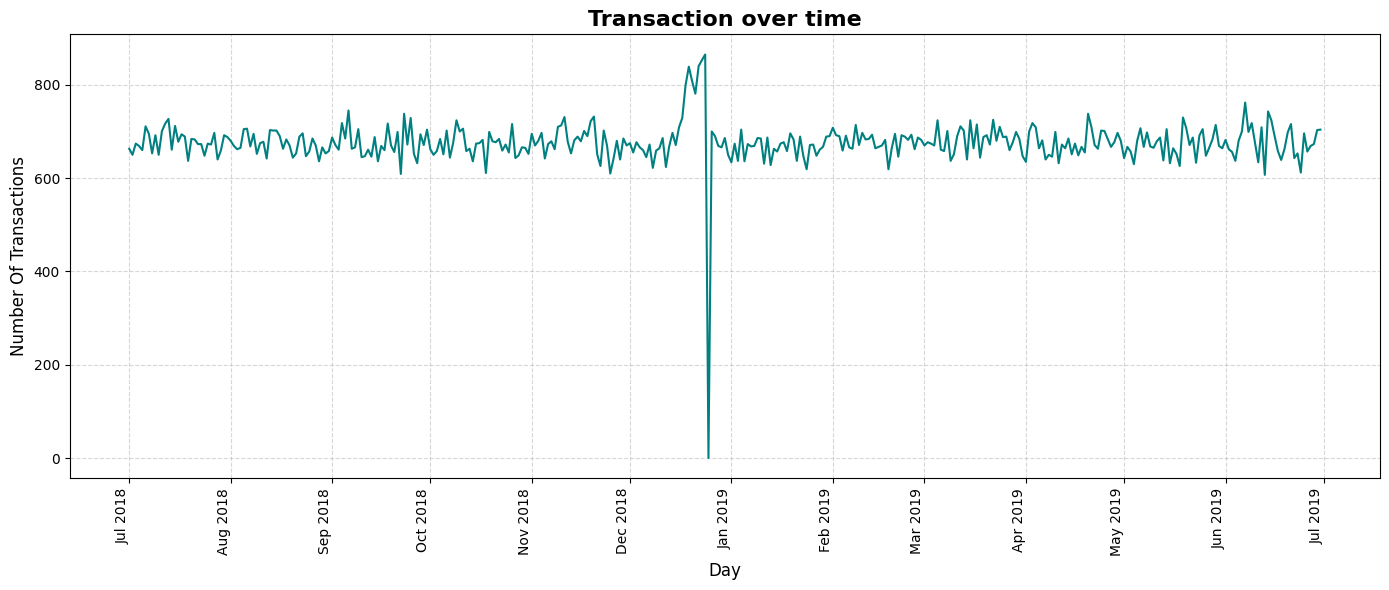

In [42]:
plt.figure(figsize=(14,6))
plt.plot(full_transactions['DATE'],full_transactions['transaction_count'],color='teal',linewidth=1.5)
plt.title('Transaction over time',fontsize=16,weight='bold')
plt.xlabel('Day',fontsize=12)
plt.ylabel('Number Of Transactions',fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=90,ha='right')
plt.grid(True,linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

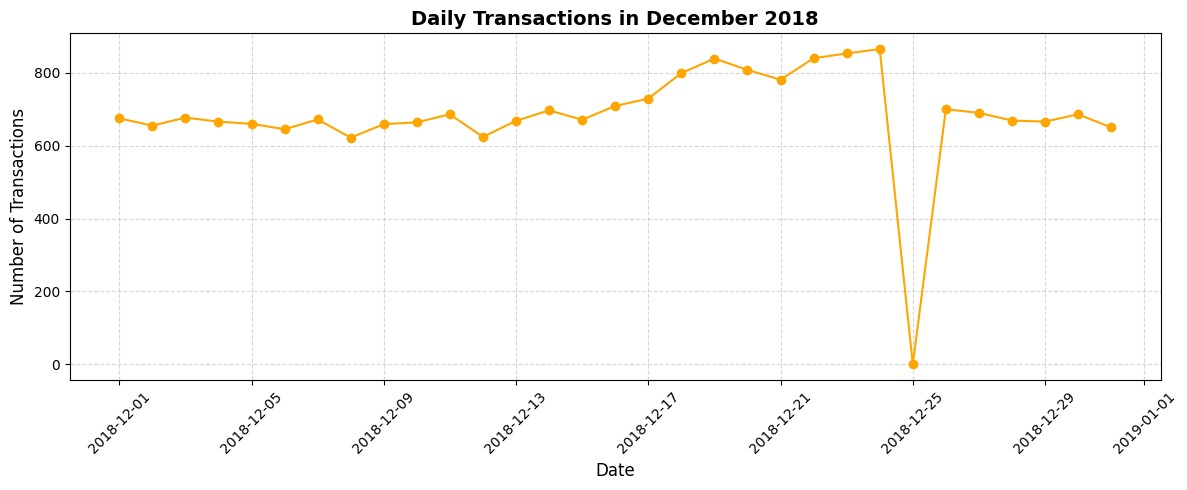

In [43]:

full_transactions['transaction_count'] = pd.to_numeric(full_transactions['transaction_count'], errors='coerce').fillna(0)

december_transactions = full_transactions[
    (full_transactions['DATE'].dt.year == 2018) &
    (full_transactions['DATE'].dt.month == 12)
]
plt.figure(figsize=(12,5))
plt.plot(december_transactions['DATE'], december_transactions['transaction_count'], marker='o', color='orange')
plt.title('Daily Transactions in December 2018', fontsize=14, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [44]:
transaction_data['PACK_SIZE']=transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)
print(transaction_data[['PROD_NAME', 'PACK_SIZE']].head())

                                  PROD_NAME  PACK_SIZE
0    Natural Chip        Compny SeaSalt175g      175.0
1                  CCs Nacho Cheese    175g      175.0
2    Smiths Crinkle Cut  Chips Chicken 170g      170.0
3    Smiths Chip Thinly  S/Cream&Onion 175g      175.0
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g      150.0


In [45]:
pack_size_counts=transaction_data.groupby('PACK_SIZE').size().reset_index(name='count')
pack_size_counts=pack_size_counts.sort_values(by='PACK_SIZE')
print(pack_size_counts)

    PACK_SIZE  count
0        70.0   1507
1        90.0   3008
2       110.0  22387
3       125.0   1454
4       134.0  25102
5       135.0   3257
6       150.0  40203
7       160.0   2970
8       165.0  15297
9       170.0  19983
10      175.0  66390
11      180.0   1468
12      190.0   2995
13      200.0   4473
14      210.0   6272
15      220.0   1564
16      250.0   3169
17      270.0   6285
18      330.0  12540
19      380.0   6416


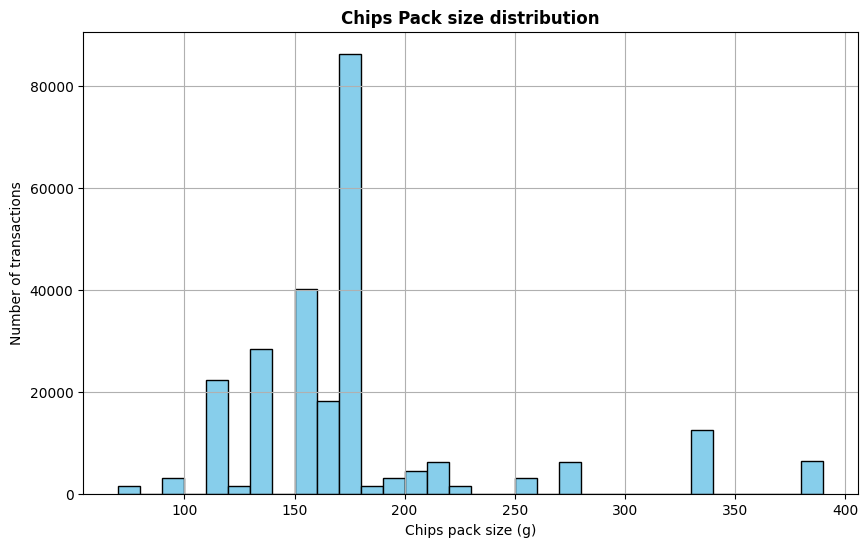

In [46]:
plt.figure(figsize=(10,6))
plt.hist(transaction_data['PACK_SIZE'],bins=range(70,400,10),color='skyblue',edgecolor='black')
plt.title('Chips Pack size distribution',weight='bold')
plt.xlabel('Chips pack size (g)')
plt.ylabel('Number of transactions')
plt.grid(True)
plt.show()

In [47]:
transaction_data['BRAND']=transaction_data['PROD_NAME'].str.split().str[0]
print(transaction_data[['PROD_NAME','BRAND']])

                                       PROD_NAME     BRAND
0         Natural Chip        Compny SeaSalt175g   Natural
1                       CCs Nacho Cheese    175g       CCs
2         Smiths Crinkle Cut  Chips Chicken 170g    Smiths
3         Smiths Chip Thinly  S/Cream&Onion 175g    Smiths
4       Kettle Tortilla ChpsHny&Jlpno Chili 150g    Kettle
...                                          ...       ...
264831   Kettle Sweet Chilli And Sour Cream 175g    Kettle
264832             Tostitos Splash Of  Lime 175g  Tostitos
264833                  Doritos Mexicana    170g   Doritos
264834   Doritos Corn Chip Mexican Jalapeno 150g   Doritos
264835             Tostitos Splash Of  Lime 175g  Tostitos

[246740 rows x 2 columns]


In [48]:
brand_counts=transaction_data.groupby('BRAND').size().reset_index(name='transaction_count')
print(brand_counts)

         BRAND  transaction_count
0       Burger               1564
1          CCs               4551
2      Cheetos               2927
3     Cheezels               4603
4         Cobs               9693
5       Dorito               3183
6      Doritos              22041
7       French               1418
8        Grain               6272
9      GrnWves               1468
10   Infuzions              11057
11      Infzns               3144
12      Kettle              41288
13         NCC               1419
14     Natural               6050
15    Pringles              25102
16         RRD              11894
17         Red               4427
18       Smith               2963
19      Smiths              27390
20       Snbts               1576
21    Sunbites               1432
22       Thins              14075
23    Tostitos               9471
24    Twisties               9454
25    Tyrrells               6442
26          WW              10320
27  Woolworths               1516


In [49]:
brand_replacements={    'Red': 'RRD',
    'Dorito': 'Doritos',
    'Infzns': 'Infuzions',
    'Smith': 'Smiths',
    'Snbts': 'Sunbites',
    'WW': 'Woolworths'}

transaction_data['BRAND']=transaction_data['BRAND'].replace(brand_replacements)
brand_counts_cleaned=transaction_data.groupby('BRAND').size().reset_index(name='transaction_count')
print(brand_counts_cleaned)

         BRAND  transaction_count
0       Burger               1564
1          CCs               4551
2      Cheetos               2927
3     Cheezels               4603
4         Cobs               9693
5      Doritos              25224
6       French               1418
7        Grain               6272
8      GrnWves               1468
9    Infuzions              14201
10      Kettle              41288
11         NCC               1419
12     Natural               6050
13    Pringles              25102
14         RRD              16321
15      Smiths              30353
16    Sunbites               3008
17       Thins              14075
18    Tostitos               9471
19    Twisties               9454
20    Tyrrells               6442
21  Woolworths              11836


In [50]:
transaction_data.shape

(246740, 10)

CUSTOMER DATA


In [51]:
customer_data.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [52]:
customer_data.shape

(72637, 3)

In [53]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [54]:
customer_data.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [55]:
print(customer_data.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [56]:
customer_data.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [57]:
merged_data=pd.merge(transaction_data,customer_data,on='LYLTY_CARD_NBR',how='left')
print(merged_data.shape)
print(transaction_data.shape)

(246740, 12)
(246740, 10)


In [58]:
file_path = r"C:\Users\India\Downloads\QVI_data.csv"  
merged_data.to_csv(file_path, index=False)

In [59]:
sales_summary=merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
print(sales_summary)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   33345.70
1   MIDAGE SINGLES/COUPLES       Mainstream   84734.25
2   MIDAGE SINGLES/COUPLES          Premium   54443.85
3             NEW FAMILIES           Budget   20607.45
4             NEW FAMILIES       Mainstream   15979.70
5             NEW FAMILIES          Premium   10760.80
6           OLDER FAMILIES           Budget  156863.75
7           OLDER FAMILIES       Mainstream   96413.55
8           OLDER FAMILIES          Premium   75242.60
9    OLDER SINGLES/COUPLES           Budget  127833.60
10   OLDER SINGLES/COUPLES       Mainstream  124648.50
11   OLDER SINGLES/COUPLES          Premium  123537.55
12                RETIREES           Budget  105916.30
13                RETIREES       Mainstream  145168.95
14                RETIREES          Premium   91296.65
15          YOUNG FAMILIES           Budget  129717.95
16          YOUNG FAMILIES       Mainstream   86338.25
17        

In [60]:
pivot_sales=sales_summary.pivot(index='LIFESTAGE',columns='PREMIUM_CUSTOMER',values='TOT_SALES')

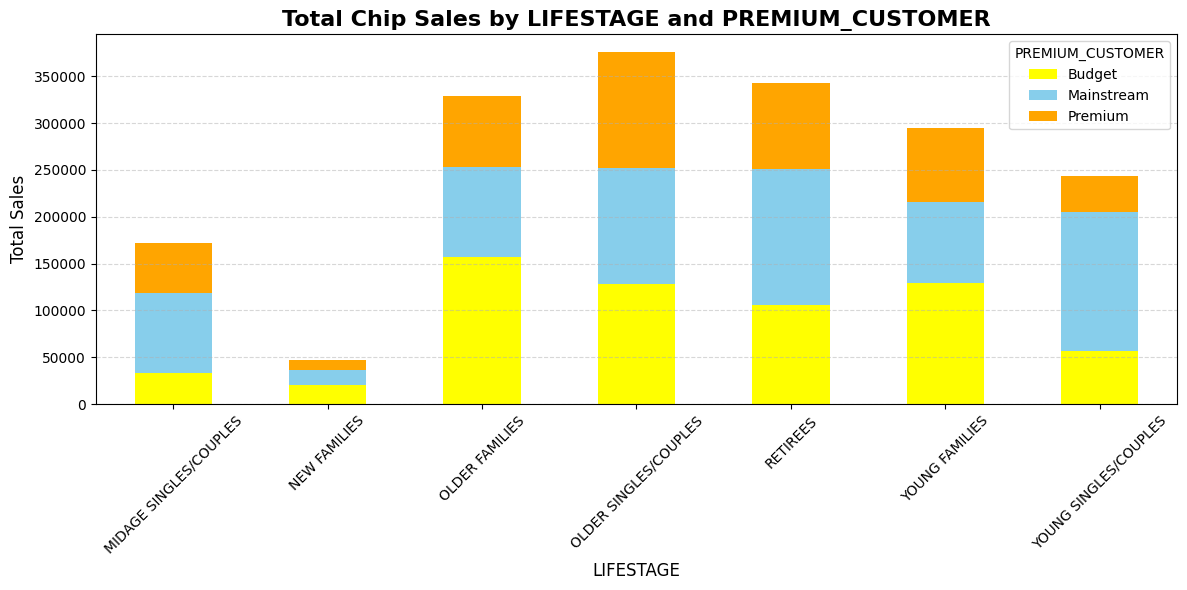

In [61]:
pivot_sales.plot(kind='bar',figsize=(12,6),stacked=True,color=['yellow','skyblue','orange'])
plt.title('Total Chip Sales by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=16, weight='bold')
plt.xlabel('LIFESTAGE',fontsize=12)
plt.ylabel('Total Sales',fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER')
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()


In [62]:
customer_counts = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'] \
                             .nunique() \
                             .reset_index(name='num_customers')

print(customer_counts)

                 LIFESTAGE PREMIUM_CUSTOMER  num_customers
0   MIDAGE SINGLES/COUPLES           Budget           1474
1   MIDAGE SINGLES/COUPLES       Mainstream           3298
2   MIDAGE SINGLES/COUPLES          Premium           2369
3             NEW FAMILIES           Budget           1087
4             NEW FAMILIES       Mainstream            830
5             NEW FAMILIES          Premium            575
6           OLDER FAMILIES           Budget           4611
7           OLDER FAMILIES       Mainstream           2788
8           OLDER FAMILIES          Premium           2231
9    OLDER SINGLES/COUPLES           Budget           4849
10   OLDER SINGLES/COUPLES       Mainstream           4858
11   OLDER SINGLES/COUPLES          Premium           4682
12                RETIREES           Budget           4385
13                RETIREES       Mainstream           6358
14                RETIREES          Premium           3812
15          YOUNG FAMILIES           Budget           39

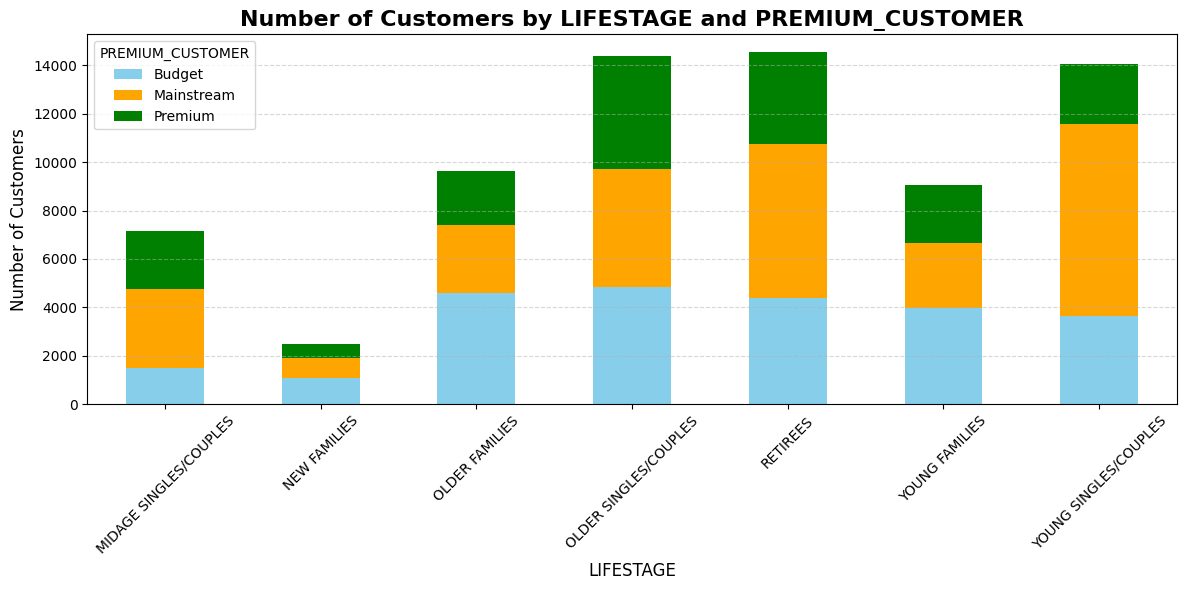

In [63]:
pivot_customers = customer_counts.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='num_customers')

pivot_customers.plot(kind='bar', figsize=(12,6), stacked=True, color=['skyblue', 'orange', 'green'])
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=16, weight='bold')
plt.xlabel('LIFESTAGE', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [64]:
price_summary =merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES','sum'),
    total_units=('PROD_QTY','sum')
).reset_index()

In [66]:
price_summary['avg_sales_per_unit']=price_summary['total_sales']/price_summary['total_units']

In [67]:
print(price_summary)

                 LIFESTAGE PREMIUM_CUSTOMER  total_sales  total_units  \
0   MIDAGE SINGLES/COUPLES           Budget     33345.70         8883   
1   MIDAGE SINGLES/COUPLES       Mainstream     84734.25        21213   
2   MIDAGE SINGLES/COUPLES          Premium     54443.85        14400   
3             NEW FAMILIES           Budget     20607.45         5241   
4             NEW FAMILIES       Mainstream     15979.70         4060   
5             NEW FAMILIES          Premium     10760.80         2769   
6           OLDER FAMILIES           Budget    156863.75        41853   
7           OLDER FAMILIES       Mainstream     96413.55        25804   
8           OLDER FAMILIES          Premium     75242.60        20239   
9    OLDER SINGLES/COUPLES           Budget    127833.60        32883   
10   OLDER SINGLES/COUPLES       Mainstream    124648.50        32607   
11   OLDER SINGLES/COUPLES          Premium    123537.55        31695   
12                RETIREES           Budget    1059

In [ ]:
pivot_price=price_summary.pivot(index='LIFESTAGE',columns='PREMIUM_CUSTOMER',values='avg_sales_per_unit')


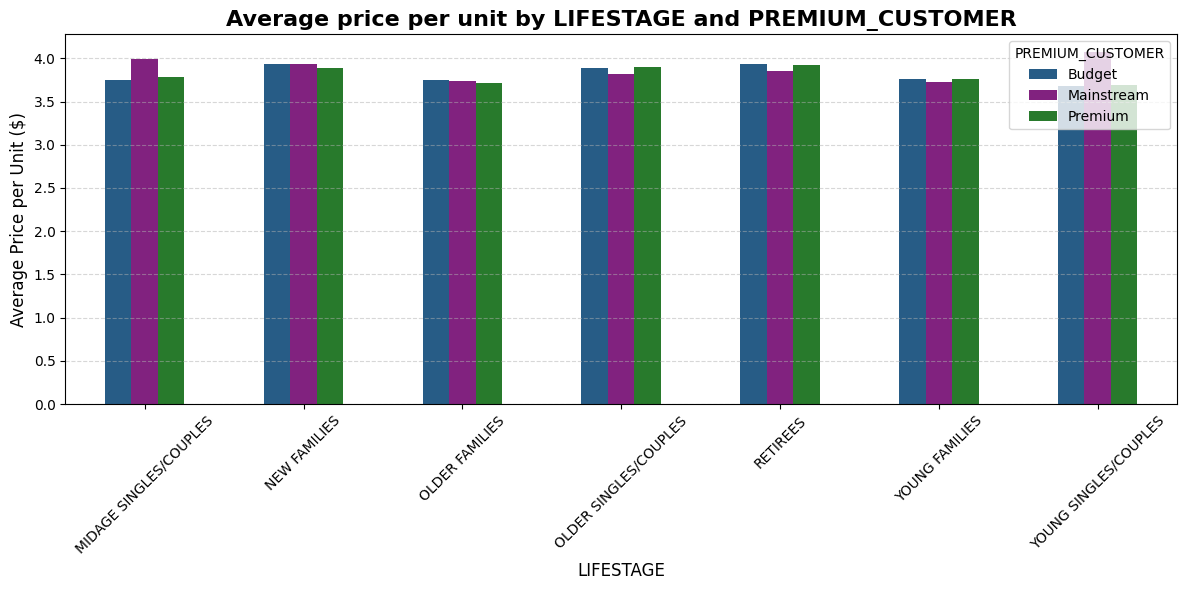

In [71]:
pivot_price.plot(kind='bar',figsize=(12,6),color=["#275C86", "#81227F", "#287A2C"])
plt.title('Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER',fontsize=16,weight='bold')
plt.xlabel('LIFESTAGE',fontsize=12)
plt.ylabel('Average Price per Unit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='PREMIUM_CUSTOMER')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [106]:
import numpy as np
subset = merged_data[
    (merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
].copy()

subset['price_per_unit'] = subset['TOT_SALES'] / subset['PROD_QTY']
subset = subset[subset['price_per_unit'].notna()]
subset = subset[np.isfinite(subset['price_per_unit'])]


In [92]:
from scipy.stats import ttest_ind

In [93]:
subset=merged_data[merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])]


In [94]:
subset = merged_data[
    (merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
    (merged_data['PREMIUM_CUSTOMER'].isin(['Budget', 'Mainstream', 'Premium']))
].copy()

subset['price_per_unit'] = subset['TOT_SALES'] / subset['PROD_QTY']


In [95]:
mainstream=subset[subset['PREMIUM_CUSTOMER']=='Mainstream']['price_per_unit']
premium=subset[subset['PREMIUM_CUSTOMER']=='Premium']['price_per_unit']
budget=subset[subset['PACK_SIZE']=='Budget']['price_per_unit']

In [103]:
t1, p1 = ttest_ind(mainstream, premium, equal_var=False)
t2, p2 = ttest_ind(mainstream, budget, equal_var=False)

print("Mainstream vs Premium: p-value =", round(p1, 4))
print("Mainstream vs Budget: p-value =", round(p2, 4))

Mainstream vs Premium: p-value = 0.0
Mainstream vs Budget: p-value = nan


In [104]:
subset.groupby('PREMIUM_CUSTOMER')['price_per_unit'].count()


PREMIUM_CUSTOMER
Budget        13264
Mainstream    30639
Premium       13464
Name: price_per_unit, dtype: int64

In [ ]:
mainstream_young = merged_data[
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]
brand_pref = (
    mainstream_young.groupby('BRAND')
    .agg({'TOT_SALES': 'sum', 'PROD_QTY': 'sum'})
    .reset_index()
    .sort_values(by='TOT_SALES', ascending=False)
)
print(brand_pref.head(10))


        BRAND  TOT_SALES  PROD_QTY
10     Kettle    35423.6      7172
5     Doritos    20925.9      4447
13   Pringles    16006.2      4326
15     Smiths    14958.9      3491
9   Infuzions     8749.4      2343
19   Twisties     7539.8      1673
18   Tostitos     7238.0      1645
17      Thins     7217.1      2187
4        Cobs     6144.6      1617
20   Tyrrells     4800.6      1143


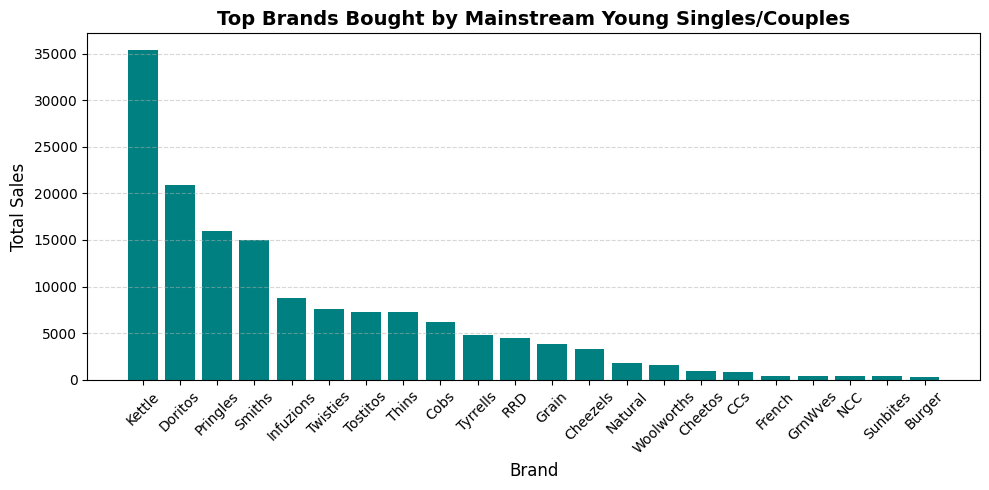

In [ ]:


plt.figure(figsize=(10,5))
plt.bar(brand_pref['BRAND'], brand_pref['TOT_SALES'], color='teal')
plt.title('Top Brands Bought by Mainstream Young Singles/Couples', fontsize=14, weight='bold')
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
target_group = merged_data[
    (merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]
rest_population = merged_data[
    ~((merged_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
      (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream'))
]


In [110]:
pack_pref_target = target_group.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
pack_pref_target['Group'] = 'Mainstream Young Singles/Couples'

pack_pref_rest = rest_population.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
pack_pref_rest['Group'] = 'Rest of Population'

pack_pref = pd.concat([pack_pref_target, pack_pref_rest])


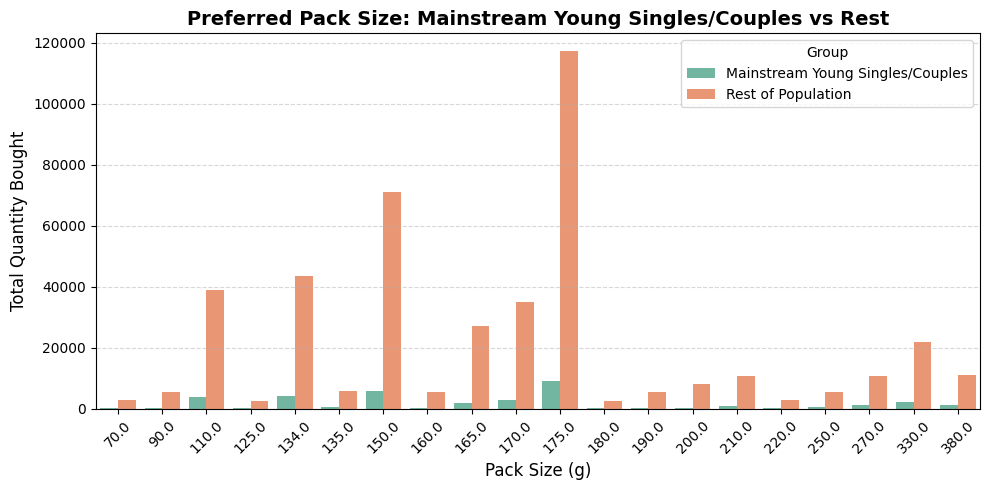

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=pack_pref, x='PACK_SIZE', y='PROD_QTY', hue='Group', palette='Set2')
plt.title('Preferred Pack Size: Mainstream Young Singles/Couples vs Rest', fontsize=14, weight='bold')
plt.xlabel('Pack Size (g)', fontsize=12)
plt.ylabel('Total Quantity Bought', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
